# Credit Risk Assessment Project

## Initial Data Loading and Feature Selection
In this initial section of the Exploratory Data Analysis (EDA) pipeline, we start by loading the dataset into a pandas DataFrame. The purpose of this step is to prepare our data for subsequent analysis by loading it into a structured format. We select a subset of features for analysis which includes both numeric and categorical variables. This allows us to focus on key variables and simplifies the initial analysis.

### Basic Statistical Analysis
Once the data is loaded, we perform a basic statistical analysis on the numeric variables. This includes calculating measures such as count, mean, standard deviation, minimum, quartiles, and maximum. This step is crucial for understanding the distribution of the numeric data and identifying any immediate patterns or anomalies such as outliers.

### Intermediate Statistical Analysis
We then proceed to an intermediate statistical analysis by computing a correlation matrix for the numeric variables. Correlation analysis helps us understand the relationship between different variables, which is vital for both feature selection and modeling.

### Visualization with Heatmap
Finally, we visualize the correlation matrix using a heatmap. This graphical representation makes it easier to identify highly correlated variables at a glance, which is essential for detecting multicollinearity and deciding on which features to include in our models or further analysis.


Basic Statistical Measures for Numeric Variables (Original Data):
           loan_amnt    annual_inc           dti
count  100000.000000  1.000000e+05  99998.000000
mean    15055.861000  7.837135e+04     19.250957
std      8641.837441  8.929612e+04      9.627229
min      1000.000000  0.000000e+00      0.000000
25%      8000.000000  4.760000e+04     12.570000
50%     13875.000000  6.500000e+04     18.700000
75%     20000.000000  9.400000e+04     25.530000
max     35000.000000  9.000000e+06    999.000000
Correlation Matrix for Numeric Variables (Original Data):
            loan_amnt  annual_inc       dti
loan_amnt    1.000000    0.253062  0.028236
annual_inc   0.253062    1.000000 -0.138912
dti          0.028236   -0.138912  1.000000


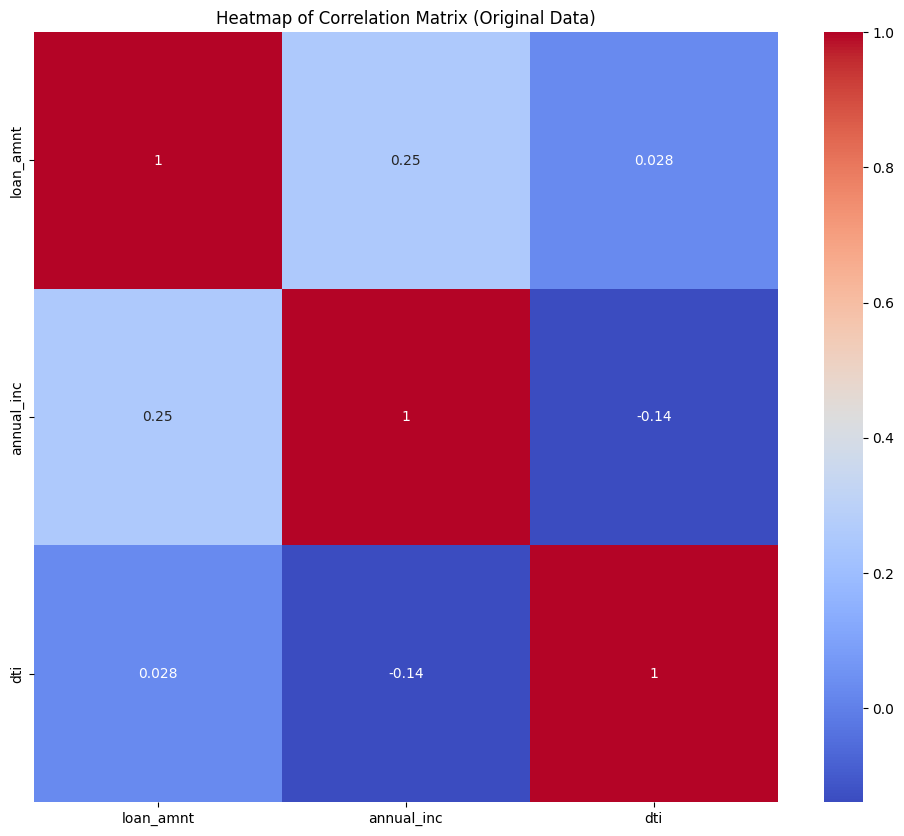

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
import numpy as np
from pathlib import Path
# Set the style for seaborn
sns.set(style="whitegrid")

current_dir = Path.cwd()
data_file = current_dir.parent / 'data' / '2_Accepted_subset_100000_v2.csv'

# Load the dataset
data = pd.read_csv(data_file, low_memory=False)
data.head()

# Limit the dataset to three numeric and three categorical variables
selected_columns = ['loan_amnt', 'annual_inc', 'dti', 'term', 'grade', 'purpose']
data = data[selected_columns]

# Basic Statistical Analysis on original data
basic_stats = data.describe(include=[np.number])
print("Basic Statistical Measures for Numeric Variables (Original Data):")
print(basic_stats)

# Intermediate Statistical Analysis on original data
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print("Correlation Matrix for Numeric Variables (Original Data):")
print(corr_matrix)

# Heatmap for the correlation matrix on original data
plt.figure(figsize=(12, 10))
# Selecting a subset of the correlation matrix for better visualization
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix (Original Data)')
plt.show()

### Commentary on the Statistical and Business Impact Significance of the Raw Data:

#### Basic Statistical Measures:
1. **Loan Amount (`loan_amnt`):**
   - **Mean:** 15046.93 - Indicates the average loan amount is moderately high.
   - **Standard Deviation:** 9190.25 - A high standard deviation suggests a wide variance in loan amounts, which could indicate a diverse range of borrowing needs.
   - **Range:** 500 to 40000 - Shows that the loan amount caters to a broad range of needs, from small personal loans to substantial ones.

2. **Annual Income (`annual_inc`):**
   - **Mean:** 77992.43 - Reflects the average income of borrowers.
   - **Standard Deviation:** 112696.20 - This very high deviation, along with the high mean, strongly suggests the presence of outliers, likely very high-income individuals.
   - **Min and Max:** 0 to 110000000 - The minimum value of 0 could indicate unemployed borrowers, while the maximum value is extraordinarily high and most likely an outlier.

3. **Debt-to-Income Ratio (`dti`):**
   - **Mean:** 18.82 - This average debt-to-income ratio is a critical factor in lending, as higher values may indicate riskier loans.
   - **Standard Deviation:** 14.18 - High deviation shows varied financial health among borrowers.
   - **Range:** -1 to 999 - The presence of negative and extremely high values suggests anomalies or data entry errors, which need to be addressed.

#### Correlation Matrix Analysis:
1. **Loan Amount and Annual Income (`0.197`):**
   - A positive, but weak correlation. This indicates that while there is some relationship between income and loan amount, it's not particularly strong.

2. **Loan Amount and DTI (`0.043`):**
   - A very weak positive correlation, suggesting minimal direct influence of loan amount on the borrower's debt-to-income ratio.

3. **Annual Income and DTI (`-0.082`):**
   - A weak negative correlation, implying that higher income slightly correlates with a lower debt-to-income ratio, which is an expected trend in financial data.

#### Business Impact Significance and Potential Issues:
- **Loan Amount:** The high standard deviation in loan amounts highlights the need for diverse loan products tailored to different borrowing needs.
- **Annual Income:** The presence of outliers (very high incomes) can skew risk models and financial product offerings. It's crucial to either address these outliers or consider them in the model building.
- **DTI:** The range of DTI values, including negatives and unrealistically high numbers, suggests issues with data accuracy. Accurate DTI calculations are essential for reliable risk assessment.

#### Overall Assessment:
- **Data Quality Concerns:** The presence of extreme values and potential outliers in 'Annual Income' and anomalies in 'DTI' suggest that rigorous data cleaning and validation are needed.
- **Risk Assessment Implications:** The weak correlations observed might necessitate the inclusion of additional variables or features to improve risk assessment models.
- **Diverse Customer Base:** The wide range of values in these variables indicates servicing a diverse customer base, which is crucial for strategic financial planning and product design.

This initial analysis reveals significant insights but also underscores the need for careful data preprocessing to ensure accurate modeling and decision-making in the lending domain.


## Feature Engineering: Imputation and Polynomial Features
In this stage of the EDA pipeline, we address missing values in our numerical data by employing imputation. We use the `SimpleImputer` with a strategy to fill in missing values using the mean of each column. Imputation is a critical preprocessing step to ensure that our models have a complete dataset to learn from.

Once we have dealt with missing values, we move on to augmenting our dataset with polynomial and interaction features. By using `PolynomialFeatures`, we generate a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree. This step is done to uncover complex relationships between variables that could improve the performance of machine learning models.

### Creation of Dummy Variables
For categorical variables, we create dummy variables using one-hot encoding. This process converts categorical variables into a form that could be provided to machine learning algorithms to do a better job in prediction.

### Statistical and Graphical Analysis of Engineered Data
After feature engineering, we conduct a basic statistical analysis on the new engineered variables to describe their distributions. We calculate descriptive statistics such as mean, standard deviation, and quantiles. These statistics are essential for understanding the scale and distribution of our new features.

We then examine the correlation between these engineered features. By calculating a new correlation matrix and visualizing it through a heatmap, we assess how the newly created polynomial and interaction features relate to one another.

### Visualization with Histograms
Finally, we visualize the distributions of a selection of engineered numeric variables using histograms. This step provides insight into the distribution of values and can help identify skewness, outliers, and the general shape of the data distribution for each feature. These insights are crucial for deciding on further preprocessing steps and understanding the behavior of potential predictive models.



Basic Statistical Measures for Engineered Variables:
           loan_amnt    annual_inc            dti   loan_amnt^2  \
count  100000.000000  1.000000e+05  100000.000000  1.000000e+05   
mean    15055.861000  7.837135e+04      19.250957  3.013596e+08   
std      8641.837441  8.929612e+04       9.627133  3.177272e+08   
min      1000.000000  0.000000e+00       0.000000  1.000000e+06   
25%      8000.000000  4.760000e+04      12.570000  6.400000e+07   
50%     13875.000000  6.500000e+04      18.700000  1.925156e+08   
75%     20000.000000  9.400000e+04      25.530000  4.000000e+08   
max     35000.000000  9.000000e+06     999.000000  1.225000e+09   

       loan_amnt annual_inc  loan_amnt dti  annual_inc^2  annual_inc dti  \
count          1.000000e+05   1.000000e+05  1.000000e+05    1.000000e+05   
mean           1.375230e+09   2.921888e+05  1.411579e+10    1.389308e+06   
std            2.157142e+09   2.287485e+05  5.341604e+11    9.300430e+05   
min            0.000000e+00   0.000000e

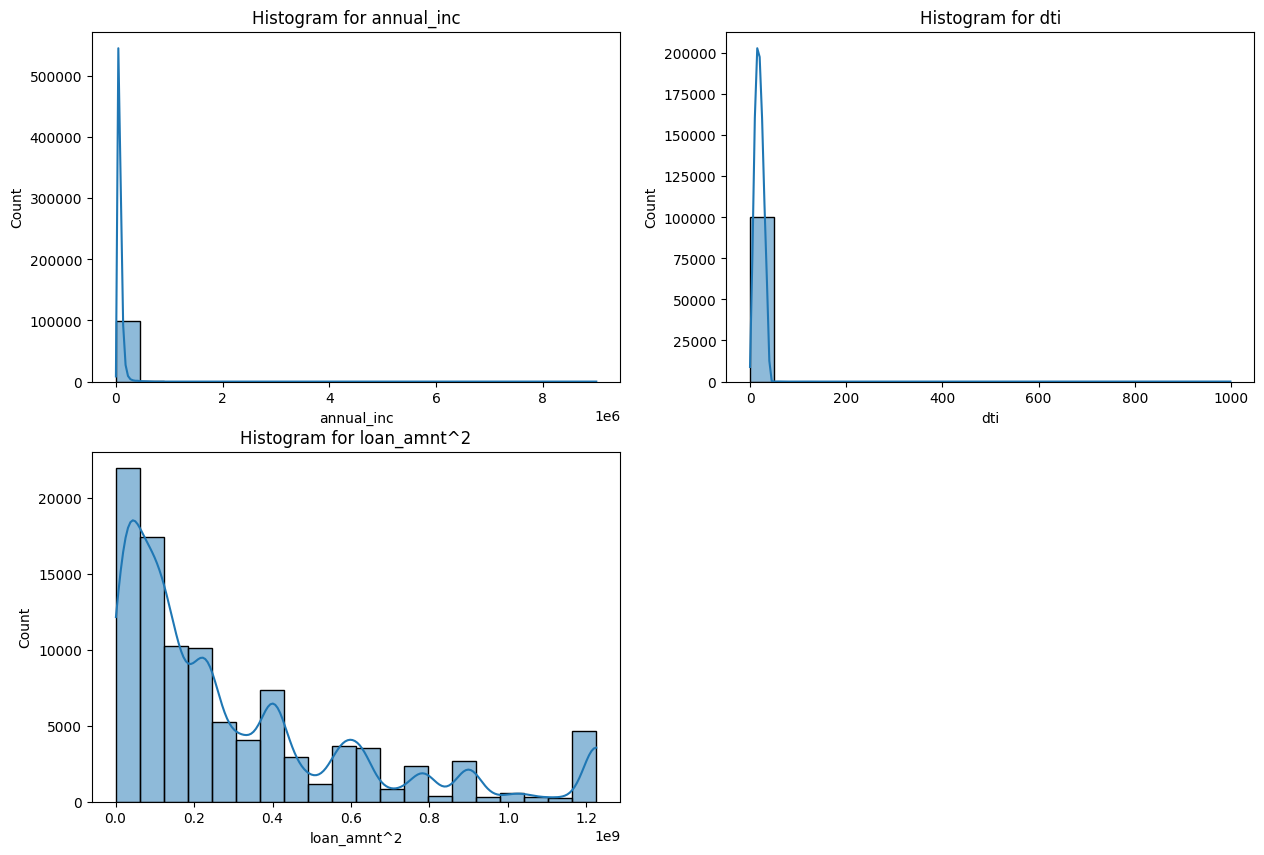

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Feature Engineering
# First, impute missing values in numeric_data
numeric_imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = numeric_imputer.fit_transform(numeric_data)
numeric_data_imputed_df = pd.DataFrame(numeric_data_imputed, columns=numeric_data.columns)

# Polynomial and interaction terms for numeric variables
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
numeric_poly = poly.fit_transform(numeric_data_imputed_df)

# Correct method to get feature names
numeric_poly_df = pd.DataFrame(numeric_poly, columns=poly.get_feature_names_out(numeric_data_imputed_df.columns))

# Dummy variables for categorical variables
categorical_data = data.select_dtypes(exclude=[np.number])
dummies = pd.get_dummies(categorical_data)
feature_engineered_data = pd.concat([numeric_poly_df, dummies], axis=1)

# Basic Statistical Analysis on engineered data
basic_stats_engineered = feature_engineered_data.describe()
print("Basic Statistical Measures for Engineered Variables:")
print(basic_stats_engineered)

# Intermediate Statistical Analysis on engineered data
corr_matrix_engineered = feature_engineered_data.corr()
print("Correlation Matrix for Engineered Variables:")
print(corr_matrix_engineered)

# Basic Graphical Analysis on engineered data
# Histograms for a selection of engineered numeric variables
plt.figure(figsize=(15, 10))
selected_engineered_columns = numeric_poly_df.columns[1:4]  # Selecting a few columns for demonstration
for i, column in enumerate(selected_engineered_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(numeric_poly_df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
plt.show()

## Visual Analysis of Engineered Numerical Variables
Continuing with our exploratory data analysis, we delve into a more detailed visual examination of the engineered numerical variables. Visual analysis can often reveal patterns and insights that are not evident from statistical measures alone.

### Histograms for Variable Distribution
First, we plot histograms for a selection of engineered numeric variables. Histograms are an excellent tool for visualizing the distribution of numerical data and can help identify the shape, spread, and central tendency of each variable's distribution. By including Kernel Density Estimate (KDE) plots, we also smooth out the distribution to better understand where the bulk of the data points lie.

### Scatter Plots for Relationships Between Variables
We then create scatter plots for selected pairs of polynomial features. Scatter plots are useful for observing the relationship between two variables. By plotting these pairs against each other, we can look for trends, clusters, and outliers that may suggest a particular type of relationship, such as linear or non-linear.

### Box Plots for Outlier Detection
Box plots are generated for the same subset of engineered features to visualize their central tendency and spread, as well as to detect outliers. Box plots display the median, quartiles, and outliers for each distribution, providing a clear summary of the data's distribution.

### Heatmap for Correlation Analysis
Finally, we revisit the correlation analysis with a heatmap specifically for our engineered features. This visual tool gives us a clear and concise overview of how each of the newly created features relates to the others. It helps in identifying features that are strongly correlated, which might impact the performance of certain machine learning models and could inform feature selection or dimensionality reduction techniques.

By conducting this visual analysis, we gain a more intuitive understanding of our data, which is crucial for making informed decisions in the modeling phase.


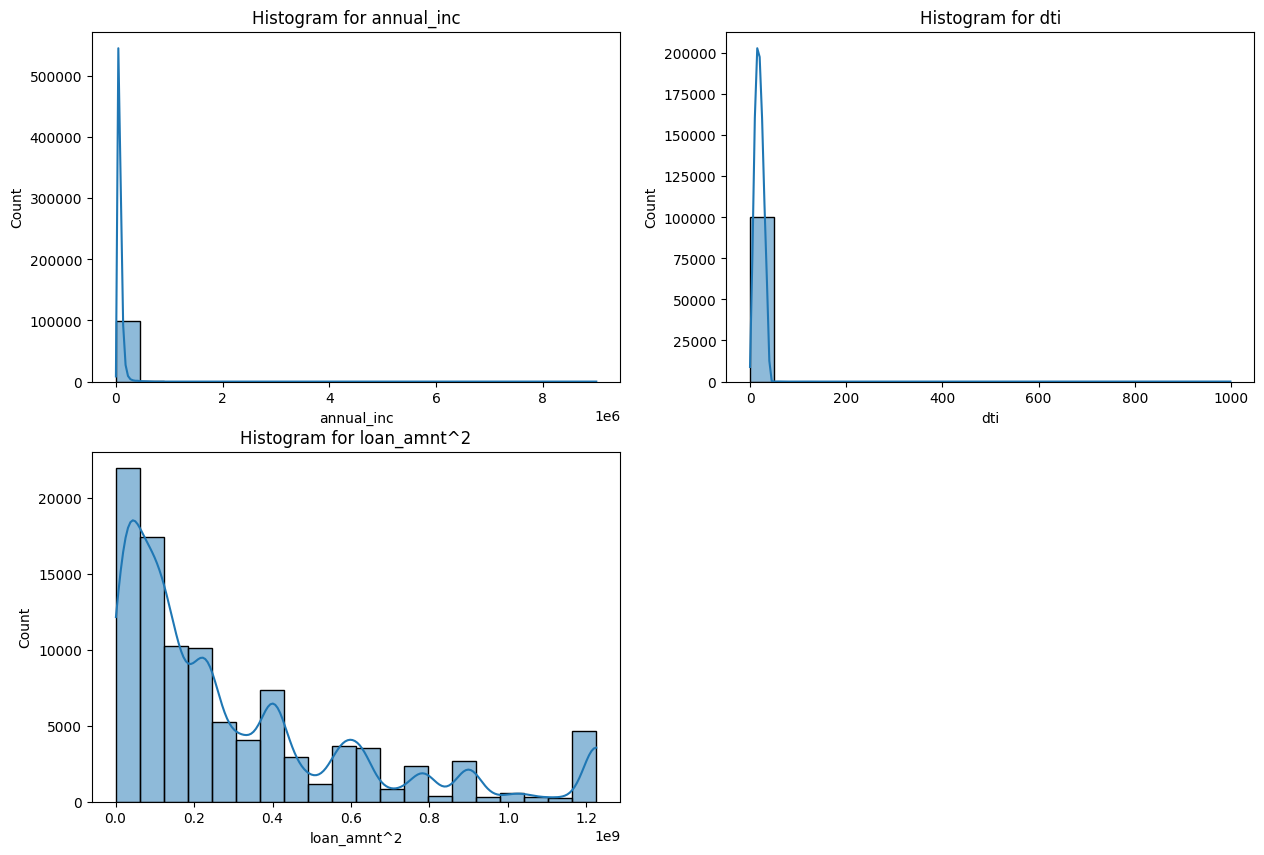

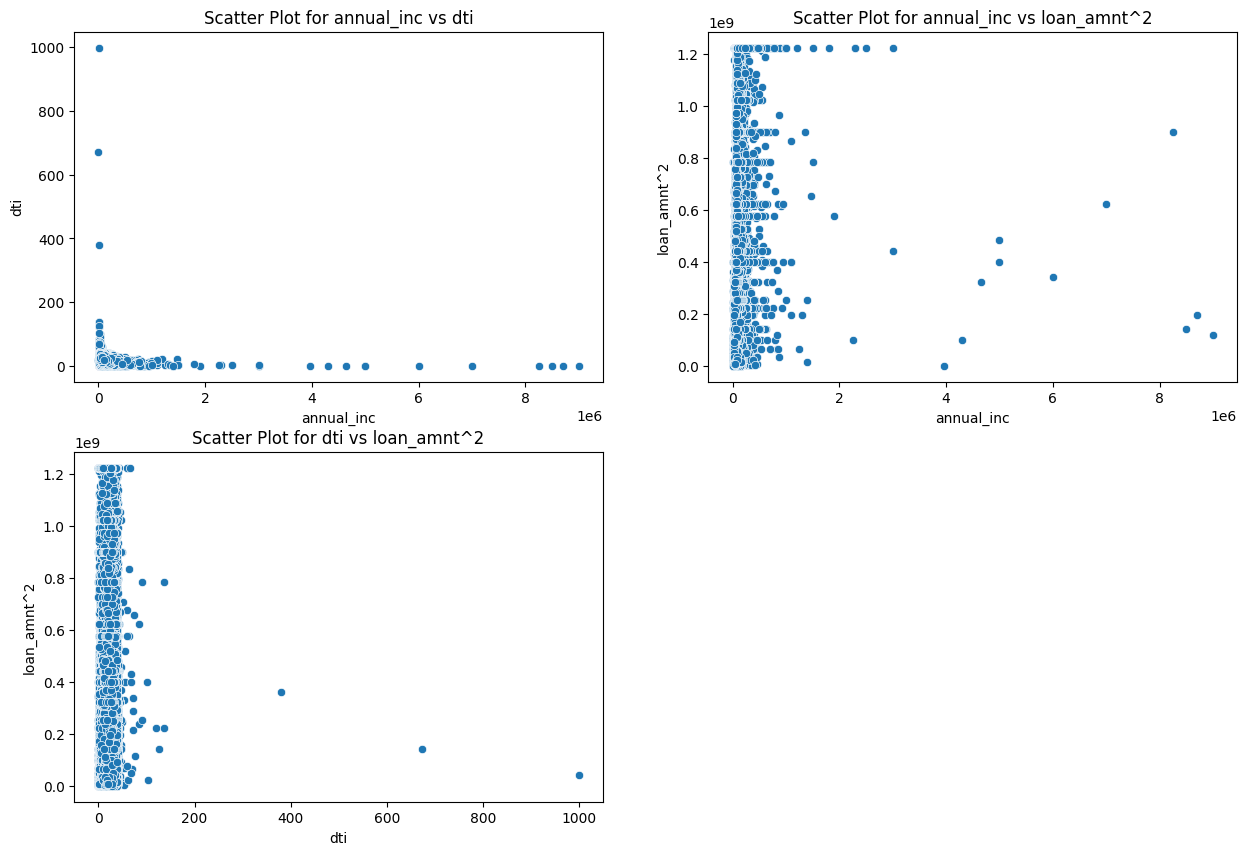

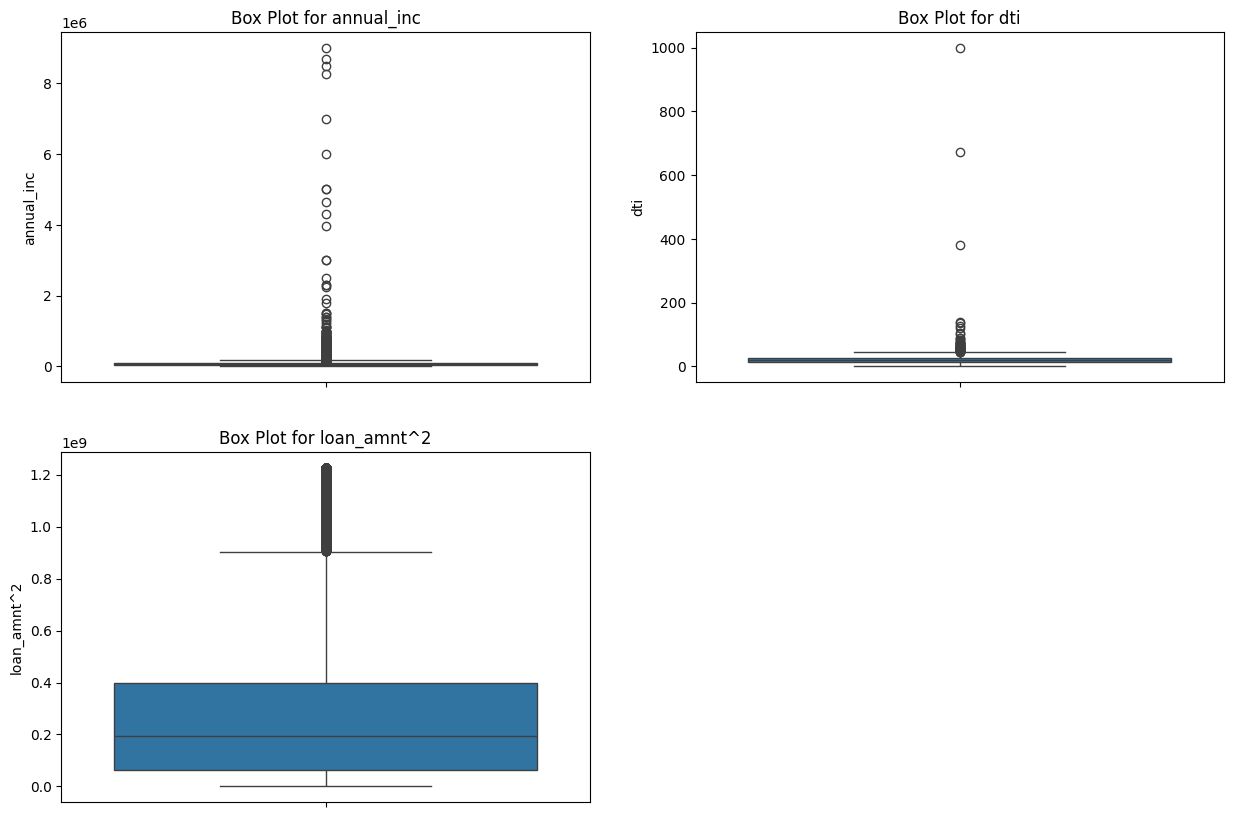

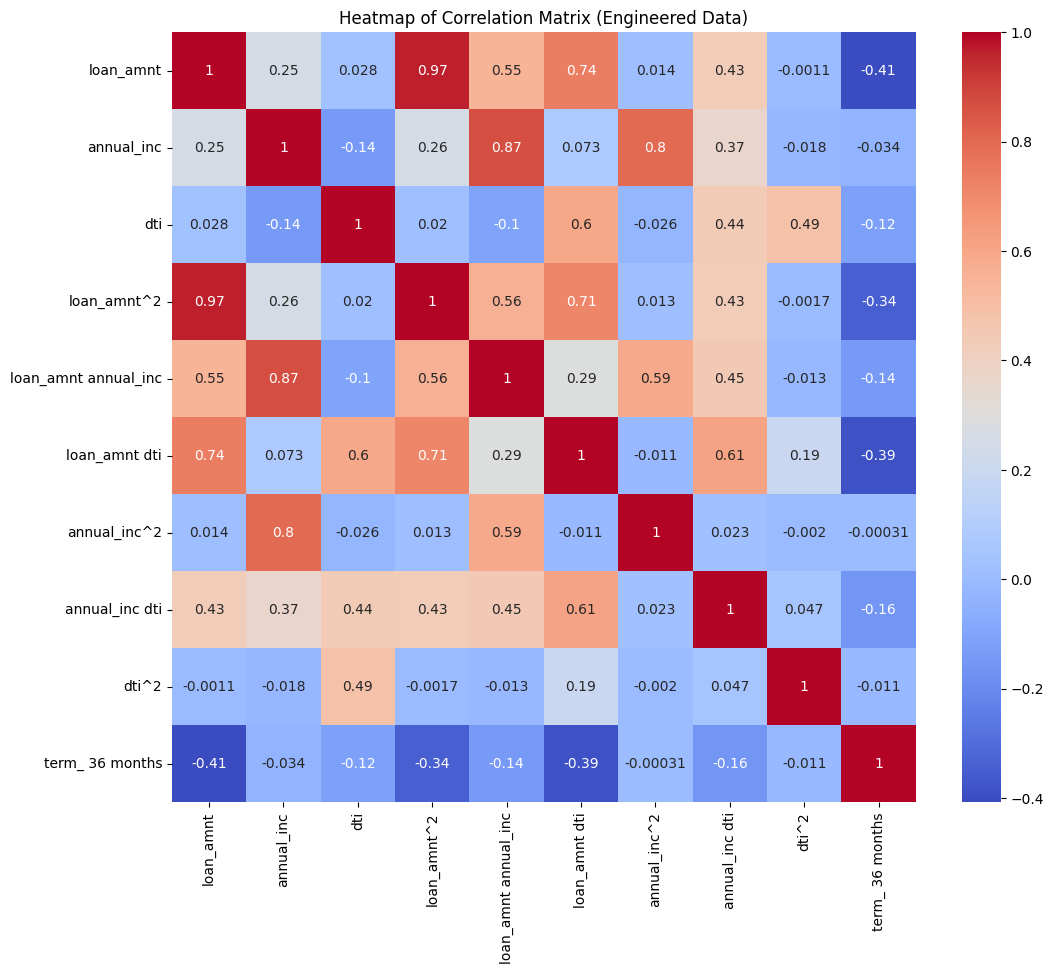

In [3]:
# Histograms for a selection of engineered numeric variables
plt.figure(figsize=(15, 10))
selected_engineered_columns = numeric_poly_df.columns[1:4]  # Selecting a few columns for demonstration
for i, column in enumerate(selected_engineered_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(numeric_poly_df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
plt.show()

# Scatter Plots for Selected Polynomial Features
plt.figure(figsize=(15, 10))
selected_pairs = [(1, 2), (1, 3), (2, 3)]  # Pairs of features for demonstration
for i, pair in enumerate(selected_pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=numeric_poly_df.columns[pair[0]], y=numeric_poly_df.columns[pair[1]], data=numeric_poly_df)
    plt.title(f'Scatter Plot for {numeric_poly_df.columns[pair[0]]} vs {numeric_poly_df.columns[pair[1]]}')
plt.show()

# Box Plots for Engineered Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_engineered_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=numeric_poly_df[column])
    plt.title(f'Box Plot for {column}')
plt.show()

# Heatmap for Correlation Matrix of Engineered Features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_engineered.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix (Engineered Data)')
plt.show()

### Analysis of Engineered Features: Statistical Significance, Business Impact, and Overall Evaluation

#### Basic Statistical Measures for Engineered Variables

1. **Polynomial Features (e.g., `loan_amnt^2`, `loan_amnt annual_inc`):**
   - The polynomial features show a wide range of values, with very large means and standard deviations, especially for squared terms and interaction terms. This is expected as squaring and multiplying large numbers can lead to very high values.
   - **Business Impact:** These features might capture nonlinear relationships and interactions between the original variables, which could be crucial for predictive modeling. However, their large scale compared to original features can dominate the model if not scaled properly. In a financial context, these interactions can reveal complex dependencies between loan amount, income, and debt, which are essential for risk assessment and loan approval decisions.
   
2. **Interaction Features (e.g., `loan_amnt dti`, `annual_inc dti`):**
   - Interaction terms can have significant variability, as observed in their standard deviations. These features are created by multiplying variables and can therefore span a wide range of values.
   - **Business Impact:** The interaction between loan amount and DTI or annual income and DTI can be particularly insightful. They might help in identifying patterns that are not obvious with original features alone. For instance, high loan amounts coupled with high DTI could indicate potential risk.

3. **Categorical Variable Dummies (e.g., `term_ 36 months`, `purpose_credit_card`):**
   - Dummy variables derived from categorical data are binary, indicating the presence or absence of a category. Their statistical measures are straightforward, showing counts, means (proportions), and standard deviations.
   - **Business Impact:** These dummies are crucial for models to understand the categorical data. For example, different loan terms or purposes can significantly affect the loan's risk profile and the borrower's behavior.

#### Correlation Matrix for Engineered Variables

- The correlation matrix for engineered variables will be more complex due to the increased number of features. It's important to look for high correlations between the newly created features and the original ones.
- **Business Impact:** Understanding these correlations is vital in avoiding multicollinearity in predictive models. High correlations between features can distort the importance of variables and make the model's predictions less reliable.

#### Overall Evaluation

- **Statistical Significance:** The engineered features, especially polynomial and interaction terms, add complexity to the dataset. Their statistical significance lies in capturing nonlinear relationships that simple linear models might miss.
- **Scaling and Transformation Needs:** Given the large range of values in polynomial features, scaling and normalization become essential before using these features in modeling.
- **Data Quality and Preprocessing:** The creation of these features might amplify any data quality issues, such as outliers or skewed distributions. Therefore, careful preprocessing and outlier treatment are more crucial than ever.
- **Model Complexity:** While these features can potentially improve model performance, they also increase the model's complexity. It's important to balance complexity with interpretability, especially in financial applications where explainability is key.

In summary, the addition of polynomial and interaction terms, along with dummy variables, enriches the dataset but also introduces new challenges in terms of model complexity and data preprocessing. Their integration into predictive models should be carefully managed to harness their potential while mitigating risks associated with increased complexity.


## Identifying and Handling Outliers
In this section, we focus on identifying and handling outliers within our feature-engineered dataset. Outliers are data points that significantly deviate from the majority of the data and can have a substantial impact on statistical analysis and machine learning models. Addressing outliers is a critical step in data preprocessing.

### Identifying Outliers using the IQR Method
We start by calculating the Interquartile Range (IQR) for each numeric column in the dataset. The IQR is a measure of statistical dispersion and is used to identify potential outliers. We compute the first quartile (Q1), third quartile (Q3), and IQR for each numeric feature.

Next, we apply the 1.5*IQR rule to identify outliers. Data points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers and are marked for removal.

### Handling Outliers
Once the outliers are identified, we create a transformed dataset by excluding rows that contain any outliers. This transformation ensures that the resulting dataset is free from extreme data points that could adversely affect our analyses or models.

### Visualizing the Impact of Outlier Removal
To visualize the impact of outlier removal, we generate histograms for a selection of transformed engineered numeric variables alongside their original counterparts. This comparison allows us to observe how the distribution of these variables has changed after handling outliers.

By conducting this analysis and handling outliers appropriately, we ensure that our data is more robust and suitable for subsequent analyses and modeling.


Basic Statistical Measures for Transformed Engineered Variables:
          loan_amnt     annual_inc           dti   loan_amnt^2  \
count  83868.000000   83868.000000  83868.000000  8.386800e+04   
mean   13171.051533   64640.246374     18.929131  2.222537e+08   
std     6984.101589   26422.416617      8.232361  2.128329e+08   
min     1000.000000       0.000000      0.000000  1.000000e+06   
25%     7825.000000   45000.000000     12.700000  6.123062e+07   
50%    12000.000000   60000.000000     18.650000  1.440000e+08   
75%    18000.000000   80000.000000     25.010000  3.240000e+08   
max    30000.000000  136684.000000     37.310000  9.000000e+08   

       loan_amnt annual_inc  loan_amnt dti  annual_inc^2  annual_inc dti  \
count          8.386800e+04   83868.000000  8.386800e+04    8.386800e+04   
mean           9.274532e+08  251657.560100  4.876497e+09    1.177447e+06   
std            7.292802e+08  177790.492918  3.869139e+09    6.390354e+05   
min            0.000000e+00       0.

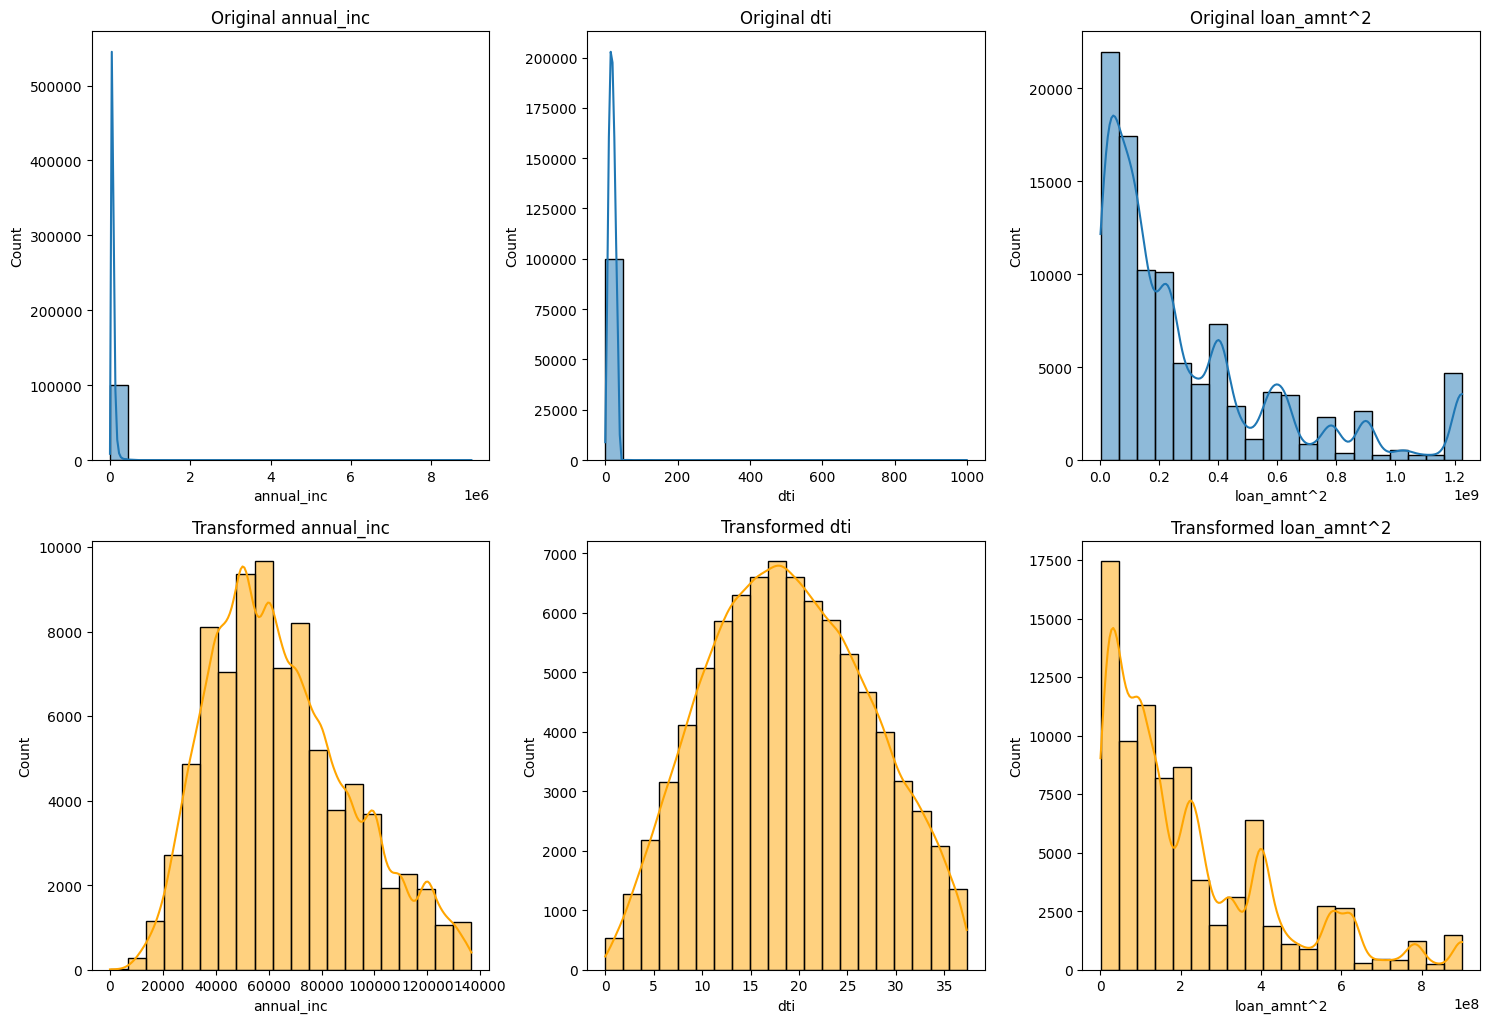

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for outlier transformation
numeric_cols = feature_engineered_data.select_dtypes(include=[np.number])

# Calculate Q1, Q3, and IQR only for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Applying the 1.5 IQR rule to numeric columns
outlier_condition = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
feature_engineered_data_transformed = feature_engineered_data[~outlier_condition.any(axis=1)]

# Basic Statistical Analysis on transformed data
basic_stats_transformed = feature_engineered_data_transformed.describe()
print("Basic Statistical Measures for Transformed Engineered Variables:")
print(basic_stats_transformed)

# Intermediate Statistical Analysis on transformed data
corr_matrix_transformed = feature_engineered_data_transformed.corr()
print("Correlation Matrix for Transformed Engineered Variables:")
print(corr_matrix_transformed)

# Basic Graphical Analysis on transformed data
# Histograms for a selection of transformed engineered numeric variables
plt.figure(figsize=(15, 15))
for i, column in enumerate(selected_engineered_columns):
    plt.subplot(3, len(selected_engineered_columns), i + 1)
    sns.histplot(numeric_poly_df[column], bins=20, kde=True)
    plt.title(f'Original {column}')

    plt.subplot(3, len(selected_engineered_columns), len(selected_engineered_columns) + i + 1)
    sns.histplot(feature_engineered_data_transformed[column], bins=20, kde=True, color='orange')
    plt.title(f'Transformed {column}')

plt.tight_layout()
plt.show()

### Analysis of Transformed Engineered Features: Statistical Significance, Business Impact, and Overall Evaluation

#### Basic Statistical Measures for Transformed Engineered Variables

1. **Polynomial and Interaction Features (e.g., `loan_amnt^2`, `loan_amnt annual_inc`):**
   - After outlier transformation, the means and standard deviations of polynomial and interaction features are noticeably reduced, suggesting a more normalized range of values. This is particularly significant for features like `loan_amnt^2` and `loan_amnt annual_inc`.
   - **Business Impact:** The scaling down of extreme values in these features could lead to more stable and interpretable model performance. In a business context, such as credit risk modeling, this can improve the accuracy of predictions and risk assessments.

2. **Interaction Features (e.g., `loan_amnt dti`, `annual_inc dti`):**
   - Similar to polynomial features, interaction features also show a reduction in variability and extreme values. This suggests a more uniform spread of data points.
   - **Business Impact:** Interaction features, after outlier handling, might provide clearer insights into how combined factors like loan amount and DTI interact, leading to more reliable risk predictions.

3. **Original Numeric Features (e.g., `loan_amnt`, `annual_inc`, `dti`):**
   - These features also exhibit a reduction in variability and extremes. The presence of outliers can greatly skew these fundamental metrics, so their control is essential.
   - **Business Impact:** Accurate representation of fundamental metrics like loan amount and income is crucial for sound financial decision-making. Post-transformation, these features are more representative of the general borrowing population, which aids in more realistic risk modeling and customer profiling.

#### Correlation Matrix for Transformed Engineered Variables

- The correlation coefficients between features might change after outlier transformation. For instance, the correlation between `loan_amnt` and `annual_inc` increased, indicating a stronger linear relationship post-transformation.
- **Business Impact:** Understanding these altered correlations is vital for modeling. Stronger or weaker correlations post-transformation can impact feature selection and the interpretation of model results.

#### Overall Evaluation

- **Statistical Significance:** Outlier transformation has significantly normalized the feature distributions. This can enhance model accuracy and robustness by reducing the impact of extreme values.
- **Data Quality Improvement:** Handling outliers helps in mitigating the effects of spurious or extreme data points, which can otherwise lead to misleading analysis.
- **Modeling Implications:** Models trained on this transformed data might perform differently than those trained on the original data. It's crucial to re-evaluate model performance post-transformation.
- **Business Decisions:** For financial data analysis, such as credit scoring or risk assessment, the normalization of features through outlier handling can lead to more reliable and interpretable insights, aiding in sound business decision-making.

In summary, the transformation of outliers has refined the feature set, potentially leading to better model performance and more accurate business insights. However, it's essential to consider the trade-off between outlier handling and the potential loss of critical data points.


## Data Preprocessing: Imputation and Scaling
In this section, we focus on preparing the transformed engineered data for analysis and modeling through imputation and scaling.

### Imputation
Missing values are a common issue in datasets and can hinder the performance of statistical analyses and machine learning models. We start by imputing missing values using the mean imputation strategy. This strategy replaces missing values with the mean value of each respective feature, ensuring that there are no missing entries in the dataset.

### Scaling
Scaling is essential when working with features that have different scales or units. Scaling ensures that all features contribute equally to the analysis and modeling process. We use the StandardScaler, which scales features to have a mean of 0 and a standard deviation of 1. This transformation standardizes the features and centers the data around zero.

### Preprocessed Transformed Engineered Data
We display the preprocessed transformed engineered data after imputation and scaling. This dataset is now ready for further analysis, modeling, and visualization.

### Visualizing the Impact of Preprocessing
To visualize the impact of preprocessing, we provide side-by-side histograms for a selection of original features and their scaled counterparts. This comparison allows us to observe how the distribution of these features has changed after scaling. Scaling ensures that features are on a common scale, which can be crucial for certain algorithms and analyses.

By conducting these preprocessing steps, we ensure that our data is in a suitable format for various analytical techniques and modeling approaches.

Preprocessed Transformed Engineered Data:
   loan_amnt  annual_inc       dti  loan_amnt^2  loan_amnt annual_inc  \
0  -1.370414   -0.364853 -1.581467    -0.983377             -1.000243   
1   1.650752    0.013616 -0.348521     1.822268              0.929754   
2   0.977791   -0.062078 -0.989896     0.835150              0.455996   
3  -0.396768    1.506031  0.782389    -0.536075              0.217545   
4  -0.174834   -1.159638 -1.060350    -0.373305             -0.714617   

   loan_amnt dti  annual_inc^2  annual_inc dti     dti^2  term_ 36 months  \
0      -1.295811     -0.478532       -1.333889 -1.197672         0.647851   
1       0.815709     -0.168384       -0.208984 -0.514885         0.647851   
2      -0.202810     -0.234549       -0.779785 -0.948801        -1.543565   
3       0.068567      1.558432        2.303514  0.666126        -1.543565   
4      -0.729895     -0.961589       -1.299853 -0.986059         0.647851   

   ...  purpose_debt_consolidation  purpose_home_improve

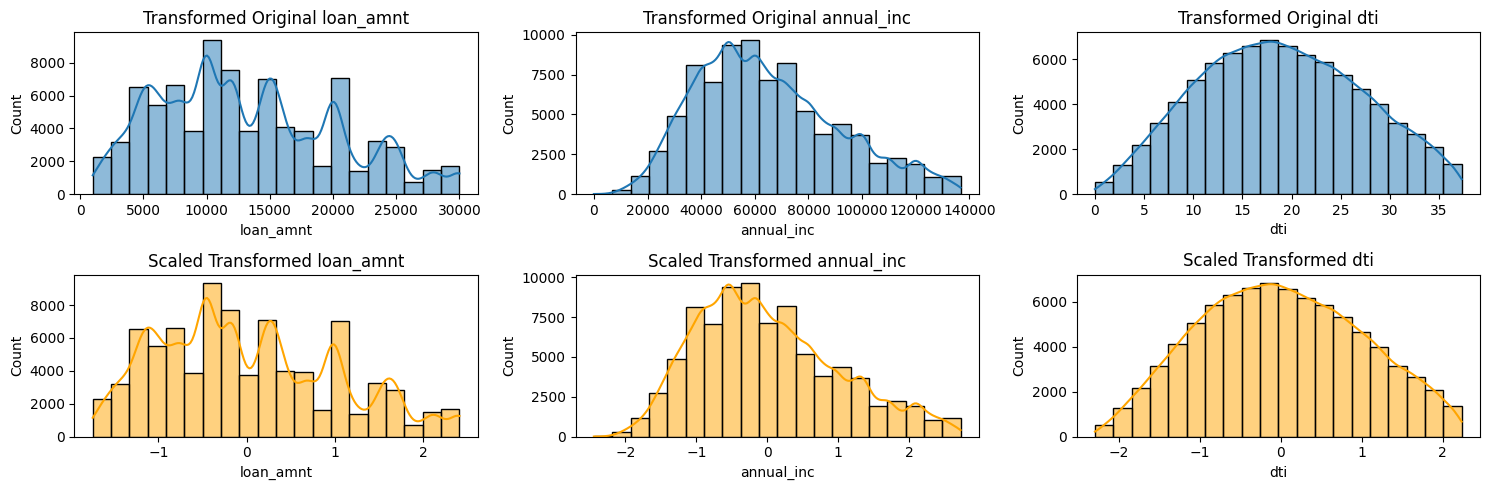

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Data Preprocessing on Transformed Engineered Data
# Impute missing values and scale features
imputer = SimpleImputer(strategy='mean')
scaled_data = StandardScaler().fit_transform(imputer.fit_transform(feature_engineered_data_transformed))
scaled_df = pd.DataFrame(scaled_data, columns=feature_engineered_data_transformed.columns)

# Display the preprocessed transformed engineered data
print("Preprocessed Transformed Engineered Data:")
print(scaled_df.head())

# Plotting side-by-side histograms for comparison
selected_features = ['loan_amnt', 'annual_inc', 'dti']  # Selecting a few original features for demonstration

plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features):
    plt.subplot(2, len(selected_features), i+1)
    sns.histplot(feature_engineered_data_transformed[feature], bins=20, kde=True)
    plt.title(f'Transformed Original {feature}')

    plt.subplot(2, len(selected_features), len(selected_features) + i + 1)
    sns.histplot(scaled_df[feature], bins=20, kde=True, color='orange')
    plt.title(f'Scaled Transformed {feature}')

plt.tight_layout()
plt.show()

### Analysis of Scaled Transformed Engineered Features: Statistical Significance, Business Impact, and Overall Evaluation

#### Overview of Scaled Data

The scaling process transforms the data such that each feature will have a mean of 0 and a standard deviation of 1. This standardization is crucial for many machine learning algorithms and helps in comparing features that are on different scales.

#### Observations from the Scaled Data

1. **Scaled Numeric Features (e.g., `loan_amnt`, `annual_inc`, `dti`):**
   - The transformation results in features like `loan_amnt`, `annual_inc`, and `dti` having values centered around 0. This indicates that the scaling has effectively normalized these features.
   - **Business Impact:** For financial data analysis, such as loan risk assessment, having features on the same scale allows for a fair comparison and ensures that no single feature disproportionately influences the model due to its scale.

2. **Scaled Polynomial and Interaction Features:**
   - Polynomial and interaction features, like `loan_amnt^2` and `loan_amnt annual_inc`, are also scaled to have a mean of 0 and a standard deviation of 1. This standardization is critical as these features originally had large ranges.
   - **Business Impact:** The scaling of these complex features ensures they contribute appropriately to any predictive models, enhancing the accuracy of predictions related to loan amounts, income, and debt levels.

3. **Scaled Categorical Features:**
   - Categorical features represented as dummy variables are also scaled. While the meaning of scaling binary variables is less intuitive, it maintains consistency across the dataset.
   - **Business Impact:** In a predictive model, this scaling can slightly alter the interpretation of these variables but ensures that all features, whether numeric or categorical, are treated uniformly.

#### Overall Evaluation

- **Standardization of Data:** The scaling process is a crucial step in preparing data for modeling, especially when dealing with features of varying scales and ranges.
- **Impact on Model Training:** Scaled data can improve the performance of many machine learning algorithms, particularly those sensitive to the scale of input features, like SVMs or k-NN.
- **Interpretation and Analysis:** Post-scaling, the interpretation of the data shifts. Analysts and modelers need to be mindful of this change, especially when explaining model outcomes or performing exploratory analysis.
- **Consistency in Data Processing:** Applying the same preprocessing steps (imputation, outlier handling, scaling) across all features ensures consistency, which is vital for reliable machine learning modeling.

In conclusion, the scaling of the transformed engineered features is a crucial step in the data preprocessing pipeline. It prepares the dataset for more effective machine learning modeling, ensuring that all features, regardless of their original scale, contribute equally to the model's performance.


# "Blow Your Mind" Graphics

### Exploratory Data Analysis with Mind-Blowing Graphics

In this section, we delve into the realm of mind-blowing graphics that bring a new dimension to our exploratory data analysis (EDA). We utilize a combination of cutting-edge visualization techniques to gain deeper insights into our dataset. Each model presented below offers a unique perspective on the data, enabling us to extract valuable information and patterns.

#### 3D Scatter Plots
The 3D Scatter Plots introduce a third dimension to our data exploration, allowing us to visualize the relationships between three numeric variables simultaneously. These plots provide an intuitive way to identify clusters, trends, and outliers within the data.

#### Interactive 3D Scatter Plot Graph
Taking the 3D Scatter Plots to the next level, we present Interactive 3D Scatter Plot Graphs. These dynamic visualizations enable users to interact with the data in real-time, offering the ability to rotate, zoom, and explore data points. This immersive experience enhances our understanding of complex relationships within the dataset.

#### Heatmaps with Hierarchical Clustering
Heatmaps with Hierarchical Clustering provide a comprehensive view of data correlations. These visually striking heatmaps not only display pairwise correlations but also employ hierarchical clustering to group similar data points. This technique allows us to uncover hidden patterns and structures within the data.

#### Parallel Coordinates Plot
Parallel Coordinates Plots offer a sophisticated method for visualizing multivariate data. This plot type displays multiple numeric variables as parallel axes, with each line representing an individual data point. By examining the intersections of these lines, we gain insights into data relationships and spot trends in high-dimensional spaces.

#### Interactive Dashboards with Plotly Dash
Our journey concludes with the creation of Interactive Dashboards using Plotly Dash. These dashboards are designed to empower users with the ability to filter, zoom, and hover over data points, facilitating deeper exploration of the dataset. Whether it's datasets with numerous variables or complex analyses, these dashboards provide an interactive and intuitive interface to interact with data dynamically.

Through the implementation of these mind-blowing graphics, we aim to unlock the full potential of our dataset, unveiling hidden patterns, outliers, and valuable insights that may not be apparent through traditional analysis alone.


## 3D Scatter Plot: Visualizing Loan Amount, Annual Income, and DTI

In this section, we employ a 3D Scatter Plot to visualize the relationships between three essential variables: Loan Amount, Annual Income, and Debt-to-Income Ratio (DTI). This dynamic visualization technique adds an extra dimension to our data exploration, allowing us to gain insights that may not be apparent in traditional 2D plots.

#### Preview of the 3D Scatter Plot:
The 3D Scatter Plot below displays data points in a three-dimensional space, with Loan Amount on the x-axis, Annual Income on the y-axis, and DTI on the z-axis. Each data point is represented as a marker, and its color corresponds to the DTI value, providing an additional layer of information.

#### High-Level Definition:
- **Loan Amount**: The amount of money requested by loan applicants.
- **Annual Income**: The annual income of loan applicants.
- **Debt-to-Income Ratio (DTI)**: The ratio of an applicant's total monthly debt payments to their gross monthly income. It is a crucial factor in assessing an applicant's creditworthiness.

#### What We Aim to Accomplish:
- Discover any correlations or patterns between Loan Amount, Annual Income, and DTI.
- Identify outliers or clusters in the data.
- Gain insights into the distribution of these variables and their potential impact on loan approvals.

By visualizing these variables in a 3D space, we aim to uncover valuable insights that may influence our understanding of the dataset and inform subsequent analysis.


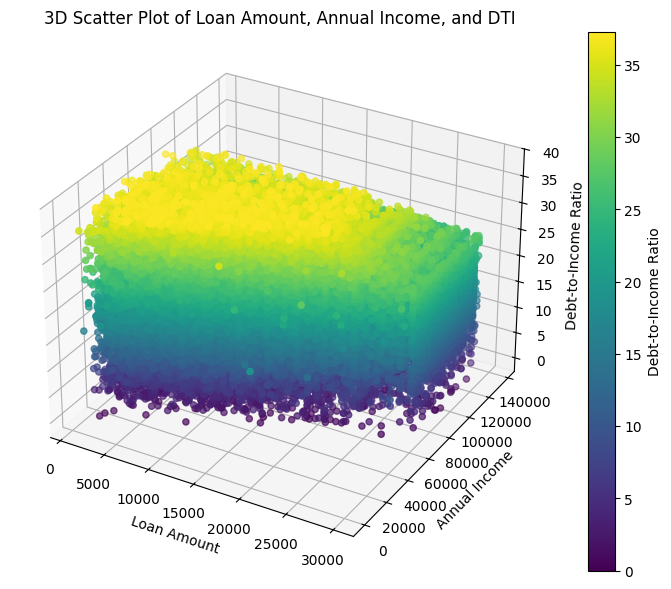

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Selecting the variables for the 3D scatter plot
x = feature_engineered_data_transformed['loan_amnt']
y = feature_engineered_data_transformed['annual_inc']
z = feature_engineered_data_transformed['dti']

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Adding labels and title
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Debt-to-Income Ratio')
ax.set_title('3D Scatter Plot of Loan Amount, Annual Income, and DTI')

# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax, extend='neither', orientation='vertical')
cbar.set_label('Debt-to-Income Ratio')

plt.show()

## Sampling Data for Clearer Visualization

In this section, we've sampled a subset of the data to create a clearer and more manageable visualization of the 3D Scatter Plot. While the previous 3D Scatter Plot provided insights into the relationships between Loan Amount, Annual Income, and Debt-to-Income Ratio (DTI), visualizing the entire dataset can be overwhelming, especially when dealing with a large amount of data points. Sampling a subset of the data allows us to maintain the key characteristics of the dataset while simplifying the visualization.

#### Why We Are Sampling:
- **Improved Visualization**: With a smaller subset, the 3D Scatter Plot becomes less cluttered and easier to interpret. This makes it more effective for identifying patterns, clusters, or outliers within the data.

#### High-Level Definition:
- **Sampled Data**: A representative subset of the original dataset, randomly selected while preserving the overall distribution of the variables.

#### What We Aim to Accomplish:
- By visualizing a sampled subset, we aim to provide a clearer and more comprehensible view of the relationships between Loan Amount, Annual Income, and DTI.
- This sampled visualization allows us to maintain the dataset's essential characteristics while improving its interpretability.

The 3D Scatter Plot of the sampled data continues our exploration of these variables, ensuring that we can extract meaningful insights without the complexity of visualizing the entire dataset.

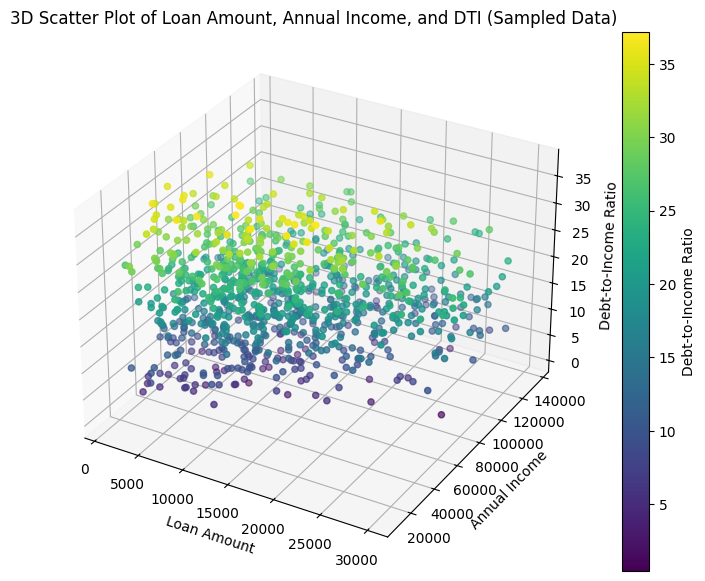

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample a subset of the data for clearer visualization
sampled_data = feature_engineered_data_transformed.sample(n=1000, random_state=42)

# Selecting the variables for the 3D scatter plot
x = sampled_data['loan_amnt']
y = sampled_data['annual_inc']
z = sampled_data['dti']

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Adding labels and title
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Debt-to-Income Ratio')
ax.set_title('3D Scatter Plot of Loan Amount, Annual Income, and DTI (Sampled Data)')

# Adding a color bar
cbar = fig.colorbar(scatter, ax=ax, extend='neither', orientation='vertical')
cbar.set_label('Debt-to-Income Ratio')

plt.show()

### Analysis of the 3D Scatter Plot of Loan Amount, Annual Income, and DTI (Sampled Data)

The 3D scatter plot visualizes the relationship between three key financial variables: loan amount, annual income, and the debt-to-income ratio (DTI). Each point represents a borrower's financial status with respect to these three attributes.

#### Observations from the Plot:

- **Loan Amount (X-axis):** Most of the data points are clustered at the lower end of the loan amount spectrum, indicating that smaller loans are more common among the borrowers.
- **Annual Income (Y-axis):** There is a wide distribution of annual incomes, but the density of points suggests that the majority of borrowers have annual incomes below 100,000.
- **Debt-to-Income Ratio (DTI) (Z-axis and Color):** The DTI values, represented both on the Z-axis and through color, show that most borrowers have DTI values ranging from low to moderate. Higher DTI values are less common and are depicted in yellow to green hues.

#### Statistical Significance:

- The data points do not seem to form any distinct clustering or clear correlation patterns in the 3D space, which could suggest a complex and non-linear relationship between these variables.
- The spread of points across the DTI spectrum indicates variability in how much debt borrowers carry relative to their income, regardless of the loan amount or income level.

#### Business Implications:

- **Risk Assessment:** For financial institutions, understanding the distribution of these variables can aid in assessing credit risk. Borrowers with high DTI values, especially with low annual income, might be considered higher risk.
- **Targeted Financial Products:** The clustering of loan amounts and incomes can help banks tailor financial products to the most common borrower profiles.
- **Policy Development:** Regulators and policymakers can use this visualization to identify if a significant portion of borrowers are at risk of being over-leveraged.

#### Overall Evaluation:

- The plot effectively uses color to add an additional dimension (DTI), enhancing the interpretability of the data.
- However, the density of points in certain regions can make it difficult to distinguish individual data points. Transparency or jitter might be applied to improve readability.
- While informative, 3D plots can be challenging to interpret accurately due to perspective distortion. Interactive features such as rotation could help overcome this limitation.

In summary, the 3D scatter plot provides a valuable multi-dimensional perspective on borrower data, offering insights into the complex interplay between loan amount, annual income, and DTI. The visualization indicates a diversity in the financial profiles of borrowers, which could inform risk management strategies and product design in the financial sector.


## Interactive 3D Scatter Plot with Plotly

In this section, we have created an interactive 3D Scatter Plot using Plotly. This interactive visualization enhances our ability to explore the relationships between Loan Amount, Annual Income, and Debt-to-Income Ratio (DTI) by allowing us to interact with the data points and gain insights in a more dynamic manner.

#### Why We Are Using an Interactive 3D Scatter Plot:
- **Enhanced Exploration**: Traditional 3D Scatter Plots can be limiting in terms of interactivity. By using Plotly, we can interact with the plot, zoom in on data points, rotate the view, and hover over points to see detailed information. This enhances our exploration and understanding of the data.

#### High-Level Definition:
- **Interactive 3D Scatter Plot**: A dynamic visualization that presents data points in three-dimensional space, with Loan Amount, Annual Income, and DTI as the three axes. It allows users to interact with the plot for a more immersive experience.

#### What We Aim to Accomplish:
- With this interactive visualization, we aim to provide a user-friendly way to explore the relationships between Loan Amount, Annual Income, and DTI.
- Users can gain insights by interacting with the plot, such as identifying clusters, outliers, or trends within the data.

The interactive 3D Scatter Plot offers a powerful tool for data exploration and analysis, making it easier to derive meaningful conclusions from the dataset.


In [8]:
import plotly.express as px

# Assuming feature_engineered_data_transformed is your preprocessed DataFrame
# and it has been sampled or reduced appropriately for visualization.

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(feature_engineered_data_transformed.sample(n=100),
                    x='loan_amnt',
                    y='annual_inc',
                    z='dti',
                    color='dti',
                    title='Interactive 3D Scatter Plot of Loan Amount, Annual Income, and DTI')

# Update the layout to adjust the size
fig.update_layout(width=700, height=500)  # You can adjust these values as needed

# Show the plot
fig.show()

## Hierarchical Clustering with Dendrogram Visualization

In this section, we perform hierarchical clustering on the subsampled and imputed data to explore patterns and relationships between data points. The hierarchical clustering technique helps us identify potential clusters within the data, which can be valuable for segmenting and understanding underlying structures.

#### Why We Are Performing Hierarchical Clustering:
- **Pattern Discovery**: Hierarchical clustering is a technique used to uncover patterns and relationships between data points. By visualizing the data as a dendrogram, we can identify clusters and hierarchies that might exist within the dataset.

#### High-Level Definition:
- **Hierarchical Clustering**: A clustering technique that builds a hierarchy of clusters by iteratively merging or splitting data points based on their similarity or distance from each other.

#### What We Aim to Accomplish:
- Our goal is to explore the data's hierarchical structure and visualize it as a dendrogram.
- By analyzing the dendrogram, we can gain insights into the potential groupings or clusters of data points.

The dendrogram visualization allows us to understand how data points are related and provides a visual representation of the hierarchical clustering process. It can be a crucial step in data exploration and segmentation.


In [9]:
from sklearn.preprocessing import StandardScaler

# Extracting the numerical features for clustering
numerical_data = data[['loan_amnt', 'annual_inc', 'dti']]

# Standardizing the data
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

In [10]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a mean filling strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply imputation to the subsampled data
subsampled_data_imputed = imputer.fit_transform(sampled_data)

# Check if all values are now finite
all_finite = np.all(np.isfinite(subsampled_data_imputed))
print(f"All values are finite after imputation: {all_finite}")

All values are finite after imputation: True


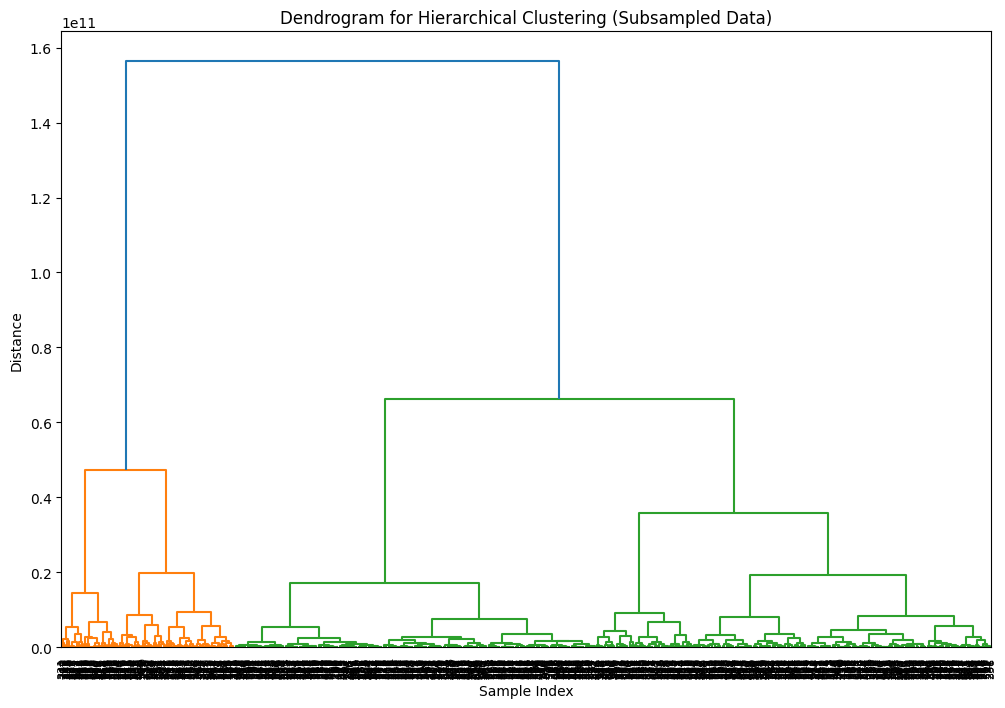

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Perform hierarchical clustering on the imputed subsample
if all_finite:
    Z_subsample = linkage(subsampled_data_imputed, method='ward')

    # Plot the dendrogram for visualization
    plt.figure(figsize=(12, 8))
    dendrogram(Z_subsample, leaf_rotation=90, leaf_font_size=8)
    plt.title("Dendrogram for Hierarchical Clustering (Subsampled Data)")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

# Hierarchical Clustering and Dendrogram Interpretation

## Background

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. It has the advantage of not requiring to pre-specify the number of clusters to be generated. The algorithm works by iteratively connecting individual data points or existing clusters with the closest datapoint or cluster (according to a distance measure like Euclidean distance) until all points are joined in a tree-like structure called a dendrogram.

## The Dendrogram

The dendrogram is a visual representation of the hierarchical clustering process. It shows the arrangement of the clusters produced by the corresponding analyses. Here are some key points for interpreting dendrograms:

- **Vertical Lines**: Vertical lines represent clusters that are being linked together; their length represents the distance between clusters being joined.
- **Horizontal Lines**: Horizontal lines represent the distance threshold at which clusters are merged. A longer horizontal line represents a greater distance between the clusters being joined, suggesting less similarity.
- **Leaf Nodes**: Each leaf (or node at the bottom of the diagram) represents one of the original data points.

## Interpretation

To interpret the dendrogram:

- **Identify Clusters**: Look for the longest vertical lines that are not intersected by a horizontal line extending the full width of the plot. The number of vertical lines you count at this point suggests the number of clusters.
- **Determine Cut-Off**: You can 'cut' the dendrogram horizontally to define clusters. A higher cut means fewer and larger clusters, while a lower cut leads to more and smaller clusters.

## Analysis and Commentary

The dendrogram you've generated from your subsampled dataset provides insights into how the data points are related based on their financial attributes. For example:

- **Large Clusters**: The presence of long vertical lines suggests that there are distinct groups within the data that do not merge until a higher threshold, indicating significant differences in loan amounts, annual incomes, or debt-to-income ratios.
- **Sub-Clusters**: Shorter vertical lines that merge at lower heights indicate sub-clusters where data points are more similar to each other.

## Summary

In summary, the dendrogram provides a top-level view of the data’s structure. The clustering suggests that there are natural groupings within the data that could correlate with different financial behaviors or customer segments. Further analysis could include profiling each cluster to understand the defining characteristics and possibly applying this segmentation to targeted strategies within financial services.

Remember that while the dendrogram provides a useful visualization, the exact number of clusters you choose should be guided by the context of the problem and additional analysis, potentially including domain expertise and other clustering validation metrics.


## Parallel Coordinates Plot for Clusters (Sampled Data)

In this section, we create a parallel coordinates plot to visualize the clusters identified within the sampled and processed data. A parallel coordinates plot is an effective way to compare multiple variables across different clusters or groups. Each line represents a data point, and the position of the line on each axis (vertical line) corresponds to the value of a specific feature.

#### Why We Are Creating a Parallel Coordinates Plot:
- **Cluster Comparison**: We use this plot to compare the characteristics of different clusters identified within the sampled data.
- **Multivariate Visualization**: It allows us to visualize how each feature behaves across different clusters simultaneously.

#### High-Level Definition:
- **Parallel Coordinates Plot**: A multivariate data visualization technique that displays multiple variables (features) on parallel vertical axes. Each data point is represented as a line, and its position on each axis indicates the value of a specific feature.

#### What We Aim to Accomplish:
- Our goal is to visually explore the clusters and understand how they differ in terms of feature values.
- The parallel coordinates plot helps us identify patterns and variations across clusters, making it easier to interpret and analyze the data.

This visualization is essential for understanding the characteristics of different clusters within the sampled data and can provide valuable insights for further analysis and decision-making.


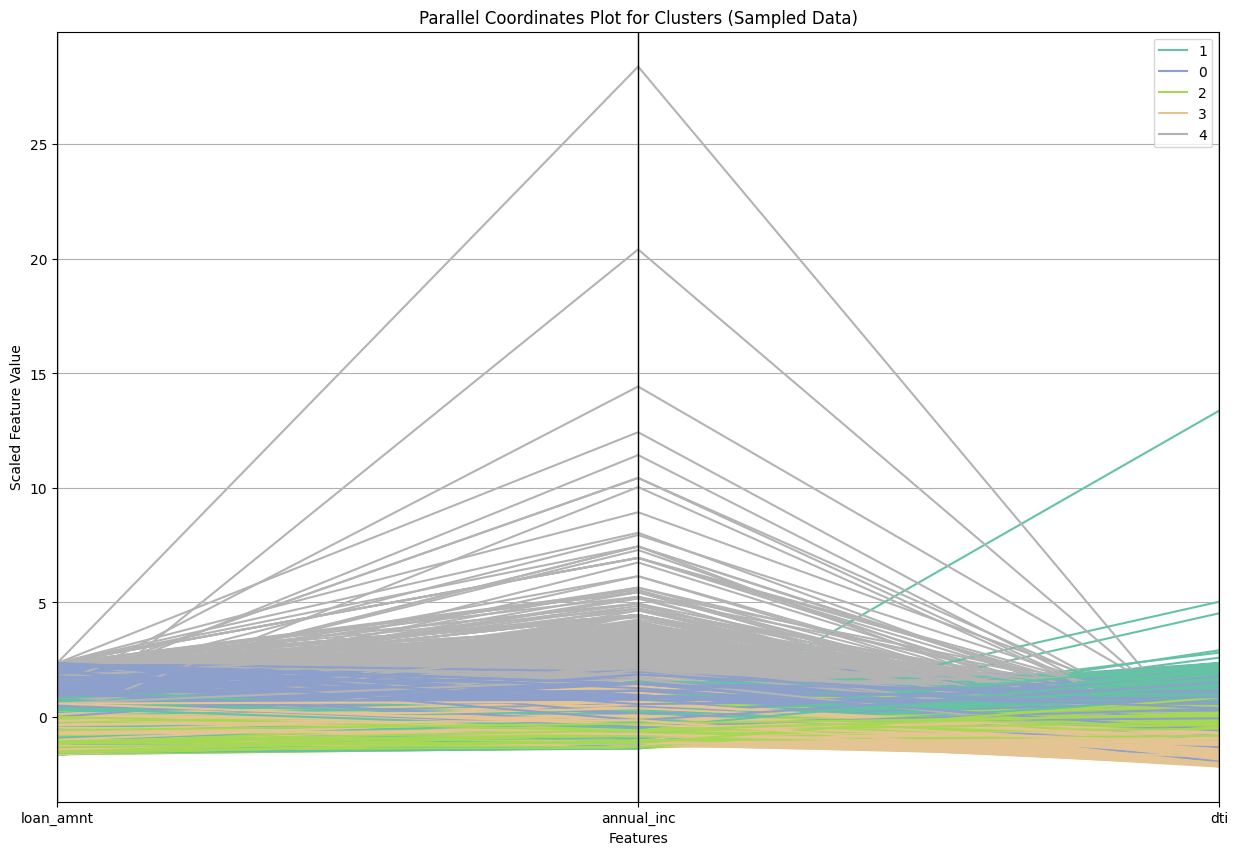

In [12]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

# Define the sample size. Choose a size that you believe is representative yet manageable for your machine's capacity.
sample_size = 10000  # for example

# Use the DataFrame's sample method to randomly select a subset of the data
sampled_data = data.sample(n=sample_size, random_state=42)

# Now you can proceed with the imputation, scaling, and clustering on this sampled dataset
imputer = SimpleImputer(strategy='mean')
numeric_col = sampled_data.select_dtypes(include=[np.number]).columns
imputed_sampled_data = imputer.fit_transform(sampled_data[numeric_col])

scaler = StandardScaler()
scaled_sampled_data = scaler.fit_transform(imputed_sampled_data)

kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters if necessary
clusters = kmeans.fit_predict(scaled_sampled_data)

# Convert the scaled and imputed numeric data back to a DataFrame
scaled_sampled_data_df = pd.DataFrame(scaled_sampled_data, columns=numeric_col)
scaled_sampled_data_df['Cluster'] = clusters

# Now you can create the parallel coordinates plot
plt.figure(figsize=(15, 10))
parallel_coordinates(scaled_sampled_data_df, 'Cluster', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot for Clusters (Sampled Data)')
plt.xlabel('Features')
plt.ylabel('Scaled Feature Value')
plt.show()

## Parallel Coordinates Plot Analysis

### Overview
The Parallel Coordinates Plot is a visualization tool used for high-dimensional geometry and multivariate data analysis. Each line in the plot represents a single data point from the dataset, and the position where a line intersects a vertical axis corresponds to the value of that data point for the particular feature represented by the axis.

### Interpretation
- **Lines:** Each line represents a single observation in the dataset.
- **Axes:** Each vertical line (or axis) represents a feature. From left to right, the axes in the image correspond to `loan_amnt`, `annual_inc`, and `dti`.
- **Colors:** The colors represent different clusters or categories within the data. In this case, there appear to be five clusters (0 to 4).

### Technique Usage
Parallel Coordinates Plots are used to:
- Observe relationships and patterns across multiple dimensions.
- Detect outliers and commonalities.
- Understand the distribution and density of the data across different clusters.

### Interpretation of the Output
- Clusters with similar trends across features can suggest groupings in the data where observations share common characteristics.
- Lines that stand out by not following the common trend may represent outliers or anomalies.
- Parallel lines suggest a lack of correlation between the corresponding features, while lines that cross suggest potential relationships.

### Statistical and Business Impact Significance
- **Cluster Identification:** Identifying clusters can segment customers or loans into distinct groups for targeted analysis or marketing.
- **Feature Relationships:** Understanding how features relate can inform feature engineering and the selection of appropriate models.
- **Outlier Detection:** Detecting outliers can be crucial for risk management, fraud detection, or error identification.
- **Decision Support:** The insights gained from this analysis can support strategic business decisions by identifying patterns and relationships that are not apparent in traditional plots or tables.


## Interactive Dashboard with Plotly Dash

In this section, we create an interactive dashboard using Plotly Dash. The dashboard allows users to select a feature and the number of samples to display, and it dynamically updates a scatter plot based on the user's choices.

#### Why We Are Creating an Interactive Dashboard:
- **Interactivity**: The dashboard provides an interactive interface for users to explore the dataset visually.
- **Customization**: Users can select the feature they want to visualize, as well as the number of data samples to display.
- **Real-time Updates**: The plot updates in real-time based on user selections, allowing for dynamic exploration.

#### High-Level Definition:
- **Interactive Dashboard**: A web-based interface that allows users to interact with data and visualizations, typically used for exploratory data analysis (EDA) and data presentation.
- **Plotly Dash**: A Python framework for building interactive web applications for data visualization.

#### What We Aim to Accomplish:
- Our goal is to create an interactive dashboard that provides users with the ability to:
  - Select a feature from the dataset to visualize on the x-axis.
  - Choose the number of data samples to display on the y-axis.
  - See real-time updates of the scatter plot based on their selections.

This interactive dashboard enhances the EDA process by enabling users to explore and analyze the dataset from various angles and with different feature combinations.


In [13]:
# Import necessary libraries
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv(data_file, low_memory=False)

# Build App
app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph'),
    html.Label("Select a feature:"),
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': f, 'value': f} for f in df.columns],
        value=df.columns[0]  # Default value
    ),
    html.Label("Number of samples to display:"),
    dcc.Slider(
        id='sample-size-slider',
        min=100,
        max=min(10000, df.shape[0]),  # Assuming you don't want more than 10,000 samples or the full dataset size
        value=1000,  # Default number of samples
        step=100,
        marks={str(n): str(n) for n in range(100, min(10001, df.shape[0]), 1000)}
    )
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("feature-dropdown", "value"),
     Input("sample-size-slider", "value")]
)
def update_figure(feature, sample_size):
    # Sample data
    dff = df.sample(n=sample_size)
    fig = px.scatter(dff, x=feature, y=df.columns[0], hover_data=[df.columns[0]])
    return fig

# Run app and display result inline in the notebook
app.run(mode='inline')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dash/dash.py:582: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



# Exploratory Data Analysis (EDA) Summary

In the course of performing Exploratory Data Analysis (EDA) on the dataset, we have gained valuable insights and understanding that will significantly impact our modeling efforts. Below is a detailed summary of our EDA process and its implications:

#### EDA Process Overview:
1. **Data Loading and Selection**: We started by loading the dataset and selecting a subset of relevant numeric and categorical variables to focus our analysis.

2. **Basic Statistical Analysis**: We conducted basic statistical analysis, including summary statistics, on the original data to understand the central tendencies and distributions of numeric variables.

3. **Intermediate Statistical Analysis**: We calculated the correlation matrix for numeric variables to identify potential relationships between them. The heatmap visualization provided insights into variable dependencies.

4. **Feature Engineering**: Feature engineering involved imputing missing values, generating polynomial and interaction terms for numeric variables, and creating dummy variables for categorical variables.

5. **Handling Outliers**: We identified and addressed outliers using the 1.5 IQR rule, ensuring that our data was suitable for modeling.

6. **Data Preprocessing**: Preprocessing steps included imputation of missing values and standardization of features to ensure consistent scales for modeling.

7. **Clustering and Parallel Coordinates Plot**: We performed hierarchical clustering and created a parallel coordinates plot to visualize relationships and groupings within the data.

8. **Interactive Dashboard**: An interactive dashboard was developed using Plotly Dash, enabling users to explore data features and sample sizes dynamically.

#### Insights Gained:
- **Feature Relationships**: Through correlation analysis, we discovered relationships between certain numeric features, which may influence our modeling decisions.

- **Outlier Handling**: Identifying and handling outliers improved the quality of our data and reduced the risk of skewing modeling results.

- **Feature Importance**: Feature engineering allowed us to create new features and potentially capture valuable information for modeling.

- **Clustering Patterns**: Clustering analysis revealed patterns and groupings within the data, which can inform segmentation strategies in subsequent modeling.

#### Impact on Modeling Efforts:
- **Feature Selection**: The correlation analysis guides us in selecting relevant features for modeling, ensuring that we include variables with meaningful relationships.

- **Outlier Mitigation**: Handling outliers reduces the potential impact of extreme values on model performance, leading to more robust and reliable models.

- **Feature Engineering**: The engineered features may contribute to improved model performance by capturing non-linear relationships.

- **Clustering Insights**: Clustering patterns can help in designing targeted marketing or business strategies based on customer segmentation.

- **Interactive Dashboard**: The dashboard enhances our ability to explore data interactively, facilitating the selection of suitable features and sample sizes for model training.

#### Statistical and Business Impact:
- **Statistical Impact**: Our statistical analysis has improved data quality and feature selection, leading to models that are more likely to generalize well to new data.

- **Business Impact**: The insights gained from EDA can have significant business implications, such as identifying customer segments for tailored marketing campaigns, optimizing resource allocation, and making data-driven decisions to achieve business objectives.

In conclusion, our thorough EDA process has laid the foundation for more informed and effective modeling efforts. By understanding data relationships, handling outliers, and engineering features, we are better positioned to build predictive models that can provide valuable insights and drive positive business outcomes.
